# Welcome to the Wikipedia Clustering Competition

For this competition you are given 11039 articles from wikipedia and you need to cluster them into 4 clusters such that the clusters accurately coincide with the 4 categories the articles belong to which are "actor", "movie", "Math" or "Mathematician". 

You are given information about the articles in two forms. 

1. First, all the text of the articles are given in file:  "raw_data.txt". This file has one line for each articles and each line has all the text of the corresponding article. To make your life easier, I have written a code that extracts the lexicon from these articles and then extract the bag of words feature for each articles. These code snippets are provided in the function definition of function Competition_solution() in commented format. Once the bag of words feature is extracted, I have saved the resultant data matrix in sparse matrix format in file "data.npz". You have the freedom to redo or edit my code for the bag of words feature extraction or write your own code to do whatever feature extraction you might want to use. However I suggest that at least to begin with, start with just loading the data matrix from the file "data.npz" which in current code is not commented and is automatically loaded in variable X for you in sparse matrix format.

2. Second, you are given a (directed) graph given in file "graph.csv" that contains the graph as a matrix with 174309 rows and two columns. Each line of the matrix lists an edge in the graph. For instance, the row "100, 200" means there is a hyperlink from wikipedia page of article # "100" linking it to article # "200".

Using the text and the hyperlink information amongst the wikipedia articles, your goal is to cluster the articles into 4 categories. You can use any library you need and write your own method. You can work in groups of size at most 4. 

Your final prediction should be returned by your function in variable "prediction" which is a matrix of size $11039 \times 1$ with entries being one of 0, 1, 2, or 3. 

We will evaluate how well your clustering predicts the actual categories of the articles and return to you accuracy in percentage. Higher the better.



In [5]:
#<GRADED>
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
from zipfile import ZipFile
import scipy
from sklearn.manifold import spectral_embedding
from sklearn.manifold import SpectralEmbedding
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import TruncatedSVD
from sklearn.mixture import GaussianMixture
from scipy.sparse.linalg import eigs
from scipy.ndimage import imread
from PIL import Image
from IPython.display import display
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

#</GRADED>

In [6]:
#<GRADED>
def Competition_solution():



# Below is the code snippet for reading the raw text for all wikipedia articles
# I used.

#     articles = {}
#     with open('../resource/asnlib/publicdata/raw_data.txt', 'r') as f2:
#        data = []
#        for line in f2:
#            data.append(line.strip().split())



# Below is the code I used to extract the lexicon from the 
# wikipedia articles 

    #n = len(data)

    #collection = []
    #for i in range(n):
    #    if(abs(i - np.round(i/100)*100) == 0):
    #        print(i,n)
    #    for j in range(len(data[i])):
    #        if(data[i][j] not in collection):
    #            collection.append(data[i][j])

    # collection.sort()

    # with open('../resource/asnlib/publicdata/lexicon.txt', 'a') as fl:
    #    for i in range(len(collection)):
    #        fl.write(collection[i]+'\n')


# Below is the code I used to form the bag of words features for all the 
# wikipedia articles 

    #X = np.zeros((len(data),len(collection)))

    #from bisect import bisect

    #for i in range(len(data)):
    #    if(abs(i - np.round(i/1000)*1000) == 0):
    #        print(i,n)
    #    for j in range(len(data[i])):
    #        indx = bisect(collection,data[i][j])
    #        X[i,indx-1] = X[i,indx-1] + 1


# Store matrix in sparse matrix format and write to file
    # X =  csr_matrix(X)

    # sp.sparse.save_npz('data_your_name.npz', XX)


# We load the extracted features into X and the graph into variable G


# Now we load the graph and the data matrix (saved as a sparse matrix)
    G = np.loadtxt('../resource/asnlib/publicdata/graph.csv')
    X = sp.load_npz('../resource/asnlib/publicdata/data.npz')
    n = X.shape[0]
    
    row_index = G[:,0].astype(np.int64)
    col_index = G[:,1].astype(np.int64)    
    A = np.zeros((n,n))
    
    for i in range(len(row_index)):
        A[row_index[i],col_index[i]]=1
        A[col_index[i],row_index[i]]=1
    

    Y = spectral_embedding(A, n_components = 12, norm_laplacian = True)
    Ypred = KMeans(n_clusters=4, random_state=0).fit(Y)
    prediction = np.zeros((n,1))
    prediction[:,0] = Ypred.labels_
    
    print(len(Ypred.labels_))
    print(sum(Ypred.labels_==0))
    print(sum(Ypred.labels_==1))
    print(sum(Ypred.labels_==2))
    print(sum(Ypred.labels_==3))

#     total = 11039
#     0 = 512
#     1 = 5061
#     2 = 4954
#     3 = 512

    

    return prediction
#</GRADED>

In [8]:
np.save('result.npy', prediction)

# Code to convert raw text in to bag of words

In [3]:
file_object  = open('raw_data.txt', encoding="utf8") 
list_lines  =  []

for i in range(11039):   
    list_lines.append(file_object.readline())


stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
# first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
# first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=200000,
                                 min_df=0.02, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(list_lines) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 36.8 s, sys: 1.3 s, total: 38.1 s
Wall time: 38.1 s
(11039, 2273)


In [3]:
words_matrix = np.load("input_X.npy").item()

In [4]:
X= words_matrix.astype(np.int64)
type(X.toarray())
X.toarray().shape

(11039, 3993)

In [3]:
X = sp.load_npz('../resource/asnlib/publicdata/data.npz')
from scipy.sparse.linalg import svds
u, s, v_trans = svds(X, k=100)

# Code to check the approximate number of reduced dimensions

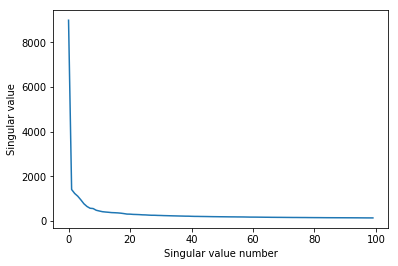

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [5]:
words_compressed, _, docs_compressed = svds(X, k=20)
docs_compressed = docs_compressed.transpose()

In [78]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)
print(words_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
subset = words_compressed[:5000,:]
projected_docs = tsne.fit_transform(subset)
print(projected_docs.shape)

(11039, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...
[t-SNE] Computed neighbors for 5000 samples in 0.977s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.004197
[t-SNE] KL divergence after 100 iterations with early exaggeration: 85.109024
[t-SNE] KL divergence after 1000 iterations: 2.421237
(5000, 2)


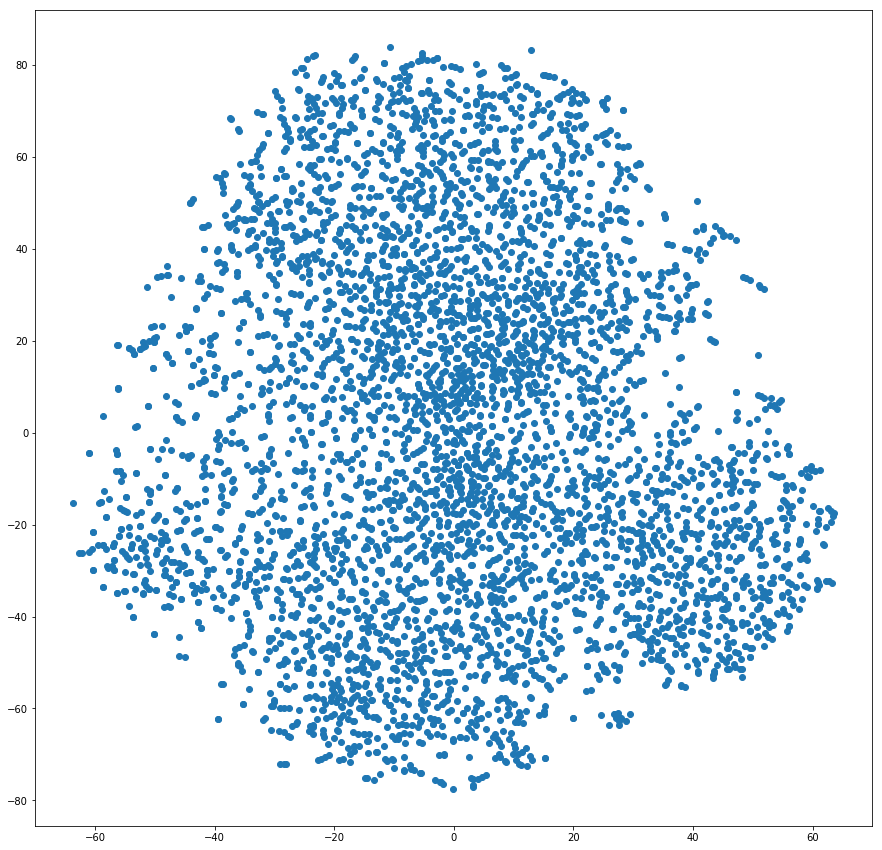

In [79]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [6]:
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)
ypred =  km.fit(words_compressed)

In [7]:
y_pred = np.zeros((11039,1))
y_pred[:,0] = ypred.labels_

In [8]:
np.save('result.npy', y_pred)

In [6]:
prediction = Competition_solution()

[5172 5172 5172 ... 9524 9524 9524]
[ 3360  2636  1059 ...  6594  4005 10479]


The following code will generate a `result.npy` file, which contains your final prediction that we will grade upon. If you want to work offline instead, you can save your work as below with the title of `result.npy` and utilize the upload feature on Vocareum for grading. 

In [15]:
np.save('result.npy', prediction)

# Using both spectral embedding and raw_data

In [3]:
G = np.loadtxt('../resource/asnlib/publicdata/graph.csv')
X = sp.load_npz('../resource/asnlib/publicdata/data.npz')
n = X.shape[0]
row_index = G[:,0].astype(np.int64)
col_index = G[:,1].astype(np.int64)

In [4]:
A = np.zeros((n,n))
for i in range(len(row_index)):
    A[row_index[i],col_index[i]]=1
    A[col_index[i],row_index[i]]=1

In [5]:
Y_link = spectral_embedding(A, n_components = 10, norm_laplacian = True)   

In [23]:
# Akshay's cell
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=1)
cca.fit(words_matrix.toarray(), Y_link)
X_c, Y_c = cca.transform(words_matrix.toarray(), Y_link)

In [7]:
# Abhishek's code
from sklearn.cross_decomposition import CCA
# X = X.astype(np.int32)
# X = X.toarray()
pca = TruncatedSVD(n_components = 10)
pca.fit(X)
Xpca = pca.transform(X)
cca = CCA(n_components=5, scale=True)
cca.fit(Xpca, Y_link)
X_c, Y_c = cca.transform(Xpca, Y_link)

# K-means on combined data

In [8]:
Ypred = KMeans(n_clusters=4, random_state=0).fit(Y_c)
y_pred = np.zeros((n,1))
y_pred[:,0] = Ypred.labels_
print(len(Ypred.labels_))
print(sum(Ypred.labels_==0))
print(sum(Ypred.labels_==1))
print(sum(Ypred.labels_==2))
print(sum(Ypred.labels_==3))

11039
2711
2640
1023
4665


In [42]:
np.save('result.npy', y_pred)
X = Y_c

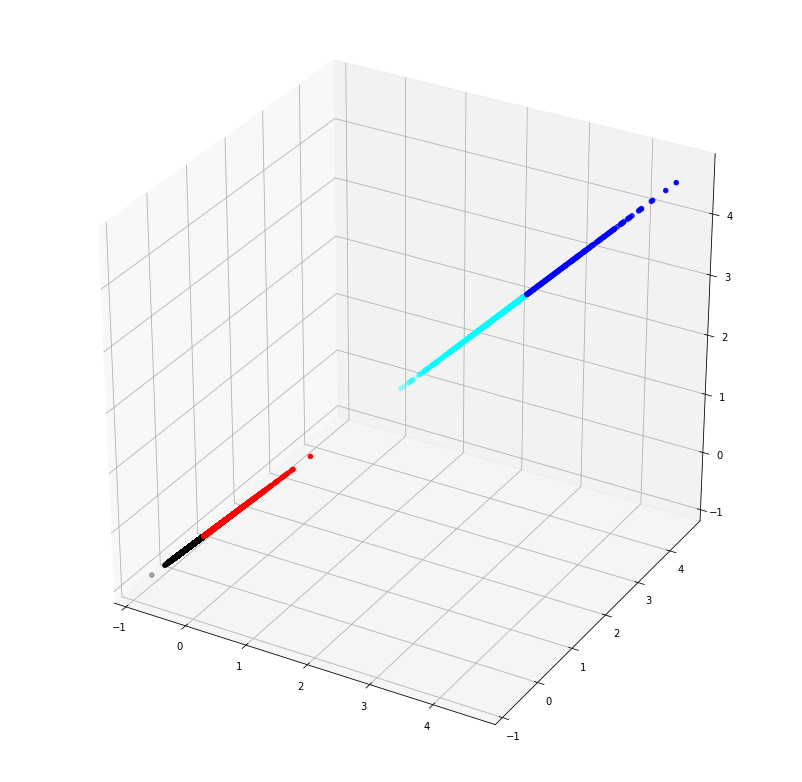

In [44]:
f = plt.figure(1, figsize = (14,14))
fig = f.add_subplot(1,1,1, projection = '3d')
fig.scatter(X[y_pred==0],X[y_pred==0],X[y_pred==0], s=20, c='red', marker='o', label='Cluster1')
fig.scatter(X[y_pred==1],X[y_pred==1],X[y_pred==1], s=20, c='blue', marker='o', label='Cluster2')
fig.scatter(X[y_pred==2],X[y_pred==2],X[y_pred==2], s=20, c='aqua', marker='o', label='Cluster3')
fig.scatter(X[y_pred==3],X[y_pred==3],X[y_pred==3], s=20, c='black', marker='o', label='Cluster4')

# Using affinity propogation on links dataset

In [18]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)    
    return (clust_labels2)

In [19]:
y_pred = doAffinity(Y_link)

In [20]:
np.save('result.npy', y_pred)
X = Y_link

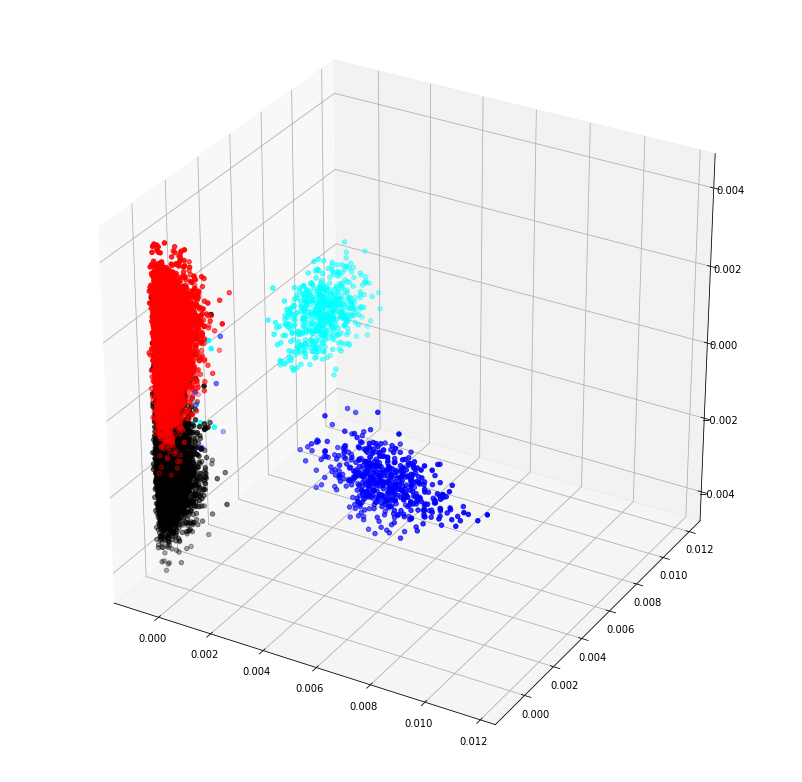

In [51]:
f = plt.figure(1, figsize = (14,14))
fig = f.add_subplot(1,1,1, projection = '3d')
fig.scatter(X[y_pred==0,0],X[y_pred==0,1],X[y_pred==0,2], s=20, c='red', marker='o', label='Cluster1')
fig.scatter(X[y_pred==1,0],X[y_pred==1,1],X[y_pred==1,2], s=20, c='blue', marker='o', label='Cluster2')
fig.scatter(X[y_pred==2,0],X[y_pred==2,1],X[y_pred==2,2], s=20, c='aqua', marker='o', label='Cluster3')
fig.scatter(X[y_pred==3,0],X[y_pred==3,1],X[y_pred==3,2], s=20, c='black', marker='o', label='Cluster4')

Accracy of 91

# Using Spectral Clustering on links Dataset

In [37]:
clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0).fit(Y_link)
y_pred = clustering.labels_

In [40]:
np.save('result_94.2.npy', y_pred)

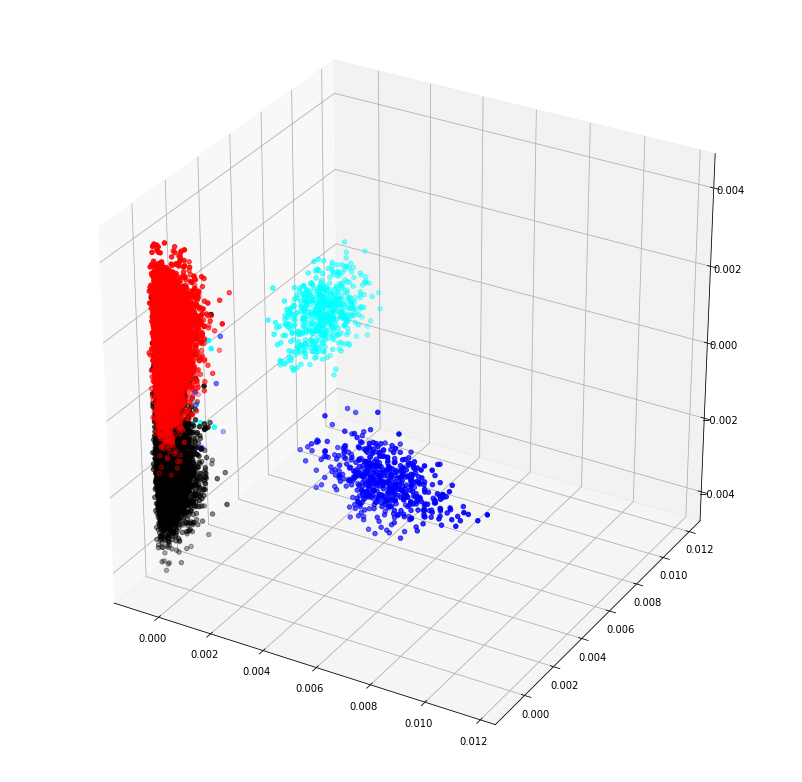

In [41]:
X = Y_link
f = plt.figure(1, figsize = (14,14))
fig = f.add_subplot(1,1,1, projection = '3d')
fig.scatter(X[y_pred==0,0],X[y_pred==0,1],X[y_pred==0,2], s=20, c='red', marker='o', label='Cluster1')
fig.scatter(X[y_pred==1,0],X[y_pred==1,1],X[y_pred==1,2], s=20, c='blue', marker='o', label='Cluster2')
fig.scatter(X[y_pred==2,0],X[y_pred==2,1],X[y_pred==2,2], s=20, c='aqua', marker='o', label='Cluster3')
fig.scatter(X[y_pred==3,0],X[y_pred==3,1],X[y_pred==3,2], s=20, c='black', marker='o', label='Cluster4')

Accracy of 94.5

# Using GMM

In [66]:
def doGMM(X, nclust=4):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

In [43]:
np.save('result.npy', y_pred)

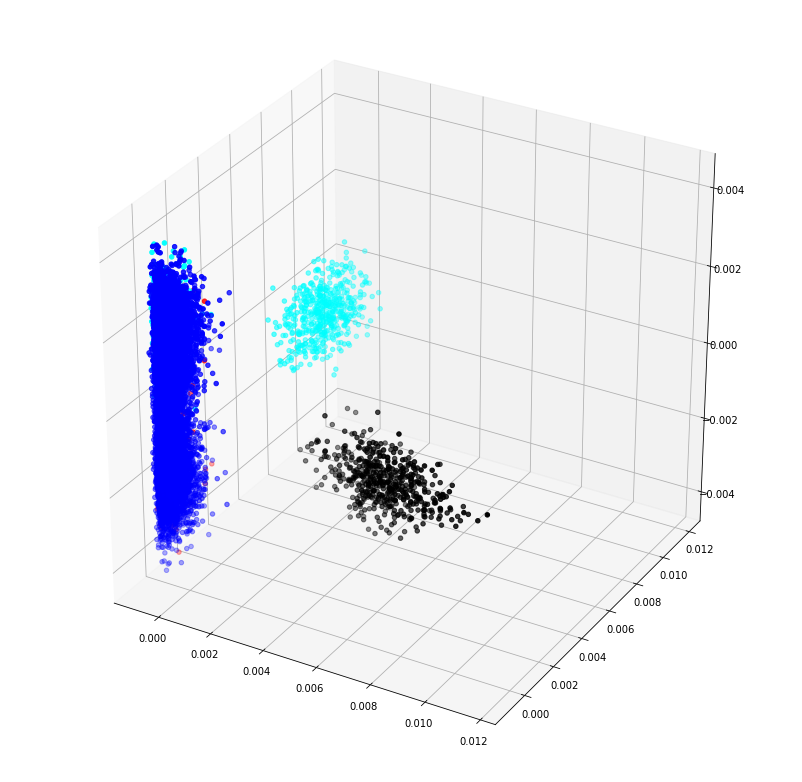

In [66]:
X = Y_link
f = plt.figure(1, figsize = (14,14))
fig = f.add_subplot(1,1,1, projection = '3d')
fig.scatter(X[y_pred==0,0],X[y_pred==0,1],X[y_pred==0,2], s=20, c='red', marker='o', label='Cluster1')
fig.scatter(X[y_pred==1,0],X[y_pred==1,1],X[y_pred==1,2], s=20, c='blue', marker='o', label='Cluster2')
fig.scatter(X[y_pred==2,0],X[y_pred==2,1],X[y_pred==2,2], s=20, c='aqua', marker='o', label='Cluster3')
fig.scatter(X[y_pred==3,0],X[y_pred==3,1],X[y_pred==3,2], s=20, c='black', marker='o', label='Cluster4')

# Using weighted graphs

In [6]:
G = np.loadtxt('../resource/asnlib/publicdata/graph.csv')
X = sp.load_npz('../resource/asnlib/publicdata/data.npz')
row_index = G[:,0].astype(np.int64)
col_index = G[:,1].astype(np.int64)
n = X.shape[0]

In [5]:
# Akshay's cell
A = np.zeros((11039,11039))
for i,index in enumerate(row_index):
    A[index,col_index[i]] +=1
# A = A + A.T

In [7]:
A = np.zeros((n,n))
for i in range(len(row_index)):
    A[row_index[i],col_index[i]] += 1
    A[col_index[i],row_index[i]] += 1

In [10]:
Y = spectral_embedding(A, n_components = 10, norm_laplacian = True)
Ypred = KMeans(n_clusters=4, random_state=0).fit(Y)
y_pred = np.zeros((n,1))
# y_pred[:,0] = Ypred.labels_

Ypred.labels_[Ypred.labels_==2] = 1000
Ypred.labels_[Ypred.labels_==3] = 2
Ypred.labels_[Ypred.labels_==1000] = 3

y_pred[:,0] = Ypred.labels_

print(len(Ypred.labels_))
print(sum(Ypred.labels_==0))
print(sum(Ypred.labels_==1))
print(sum(Ypred.labels_==2))
print(sum(Ypred.labels_==3))



#     0 = 512
#     1 = 5061
#     2 = 4954
#     3 = 512


11039
512
4967
5048
512


In [11]:
np.save('result.npy', y_pred)